### **Introduction**
This project explores UFC fighter and event data to identify key patterns in performance. By analyzing metrics such as striking accuracy, takedown efficeny and submissions, we aim to better understand what leads to success in octagon.


### **Objective**

Analyze UFC fighter performance metrics to uncover trends, evaluate factors influencing outcomes and providing insights into fighter performance across different weight class, fighting styles and events. By doing this data analysis, we aim to explore relationships between key metrics such as strikig accuracy, takedown efficency and submission rates and their impact on match results. 

In [441]:
# imported python libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [442]:
# Loading the files
fighter_stats_path = r"../Datasets/fighter_stats.csv"
medium_dataset_path = r"../Datasets/medium_dataset.csv"
# Reading files
fighter_data = pd.DataFrame(pd.read_csv(fighter_stats_path))
event_detail_data = pd.DataFrame(pd.read_csv(medium_dataset_path))


In [443]:
#shape of fighter data
fs = fighter_data.shape
print("Fighter data")
print("Rows: ",fs[0])
print("Columns: ",fs[1])

Fighter data
Rows:  2479
Columns:  16


In [444]:
#shape of event detail data
es = event_detail_data.shape
print("Event detail data")
print("Rows: ", es[0])
print("Columns: ", es[1])

Event detail data
Rows:  7582
Columns:  19


In [445]:
# showing top 5 rows of fighter_data
fighter_data.head()

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2
3,Justin Tafa,7.0,4.0,182.88,119.75,187.96,Southpaw,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,190.50,Orthodox,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6


In [446]:
#showing top 5 rows of event_details_data
event_detail_data.head()

,event,date,location,r_fighter,b_fighter,status,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,method,method_detailed,round,time
0,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Rose Namajunas,Amanda Ribas,win,0.0,0.0,93.0,83.0,1.0,4.0,0.0,0.0,Women's Flyweight,U-DEC,NaN,5.0,5:00
1,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Karl Williams,Justin Tafa,win,0.0,0.0,40.0,21.0,7.0,0.0,1.0,0.0,Heavyweight,U-DEC,NaN,3.0,5:00
2,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Edmen Shahbazyan,AJ Dobson,win,1.0,0.0,27.0,15.0,1.0,0.0,0.0,0.0,Middleweight,KO/TKO,Punches,1.0,4:33
3,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Payton Talbott,Cameron Saaiman,win,1.0,0.0,79.0,31.0,0.0,0.0,0.0,0.0,Bantamweight,KO/TKO,Punches,2.0,0:21
4,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Youssef Zalal,Billy Quarantillo,win,0.0,0.0,33.0,10.0,2.0,0.0,2.0,0.0,Featherweight,SUB,Rear Naked Choke,2.0,1:50


### **Cleaning data of Fighter Data**

In [447]:
#Info about the columns in fighter_data
fighter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2478 non-null   object 
 1   wins         2478 non-null   float64
 2   losses       2478 non-null   float64
 3   height       2478 non-null   float64
 4   weight       2478 non-null   float64
 5   reach        1823 non-null   float64
 6   stance       2401 non-null   object 
 7   age          2318 non-null   float64
 8   SLpM         2478 non-null   float64
 9   sig_str_acc  2478 non-null   float64
 10  SApM         2478 non-null   float64
 11  str_def      2478 non-null   float64
 12  td_avg       2478 non-null   float64
 13  td_acc       2478 non-null   float64
 14  td_def       2478 non-null   float64
 15  sub_avg      2478 non-null   float64
dtypes: float64(14), object(2)
memory usage: 310.0+ KB


In [448]:
#Finding unique values in each column
fighter_data.nunique()

name           2472
wins             54
losses           33
height           23
weight           80
reach            27
stance            5
age              47
SLpM            620
sig_str_acc      75
SApM            629
str_def          76
td_avg          486
td_acc           82
td_def           92
sub_avg          64
dtype: int64

In [449]:
#Statistical description of non-categorial column in fighter_data
fighter_data.describe()

,wins,losses,height,weight,reach,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
count,2478.000000,2478.000000,2478.000000,2478.000000,1823.000000,2318.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000
mean,14.399112,6.111380,178.384262,76.876852,182.035656,37.727783,2.932623,0.406029,3.388567,0.488910,1.393543,0.322571,0.494972,0.602179
std,9.853474,4.548011,8.851777,17.976646,10.654129,7.251188,1.736693,0.151297,2.027258,0.162305,1.512821,0.256928,0.297551,1.057863
min,0.000000,0.000000,152.400000,52.160000,147.320000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,3.000000,172.720000,65.770000,175.260000,32.000000,1.810000,0.360000,2.320000,0.450000,0.120000,0.070000,0.300000,0.000000
50%,13.000000,5.000000,177.800000,77.110000,182.880000,37.000000,2.900000,0.430000,3.230000,0.520000,1.000000,0.330000,0.550000,0.300000
75%,18.000000,8.000000,185.420000,83.910000,190.500000,42.000000,3.920000,0.500000,4.290000,0.580000,2.065000,0.480000,0.710000,0.800000
max,253.000000,53.000000,210.820000,349.270000,213.360000,81.000000,23.330000,1.000000,42.000000,1.000000,13.950000,1.000000,1.000000,16.400000


In [450]:
#Statistical description of categorical column in fighter data
fighter_data.describe(include='object')

,name,stance
count,2478,2401
unique,2472,5
top,Felix Lee Mitchell,Orthodox
freq,3,1840


In [451]:
#Checking if there is any null values in fighter data
fighter_data.isna().sum()

name             1
wins             1
losses           1
height           1
weight           1
reach          656
stance          78
age            161
SLpM             1
sig_str_acc      1
SApM             1
str_def          1
td_avg           1
td_acc           1
td_def           1
sub_avg          1
dtype: int64

In [452]:
#check for null rows
null_rows = fighter_data[fighter_data.isna().any(axis=1)]
null_rows

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
21,Daria Zhelezniakova,9.0,1.0,175.26,61.23,172.72,NaN,28.0,3.80,0.38,1.67,0.82,0.00,0.00,0.50,0.0
1101,Jesus Pinedo,16.0,5.0,177.80,70.31,NaN,Southpaw,27.0,3.23,0.38,4.37,0.52,2.50,1.00,1.00,0.0
1131,Michel Batista,4.0,1.0,190.50,117.93,NaN,Orthodox,39.0,0.00,0.00,4.03,0.40,6.72,0.50,0.00,0.0
1166,Kalindra Faria,18.0,8.0,170.18,56.70,NaN,Switch,37.0,2.23,0.56,1.44,0.45,1.31,0.66,0.20,0.7
1182,Jay Cucciniello,8.0,1.0,170.18,70.31,NaN,Orthodox,37.0,0.93,0.21,4.73,0.36,0.00,0.00,0.71,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,Thaddeus Luster,0.0,1.0,190.50,95.25,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2475,David Levicki,1.0,3.0,195.58,124.74,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2476,Ray Wizard,0.0,1.0,187.96,102.06,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2477,Sean Daugherty,0.0,2.0,182.88,79.38,NaN,NaN,48.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


In [453]:
#Dropedd row at index 2478 as it is null
fighter_data = fighter_data.drop(index=2478)

In [454]:
#checking which null values are left
fighter_data.isna().sum()

name             0
wins             0
losses           0
height           0
weight           0
reach          655
stance          77
age            160
SLpM             0
sig_str_acc      0
SApM             0
str_def          0
td_avg           0
td_acc           0
td_def           0
sub_avg          0
dtype: int64

In [455]:
# Finding out the percentage of empty data
(fighter_data.isna().sum() / len(fighter_data)) * 100

name            0.000000
wins            0.000000
losses          0.000000
height          0.000000
weight          0.000000
reach          26.432607
stance          3.107345
age             6.456820
SLpM            0.000000
sig_str_acc     0.000000
SApM            0.000000
str_def         0.000000
td_avg          0.000000
td_acc          0.000000
td_def          0.000000
sub_avg         0.000000
dtype: float64

<Axes: ylabel='reach'>

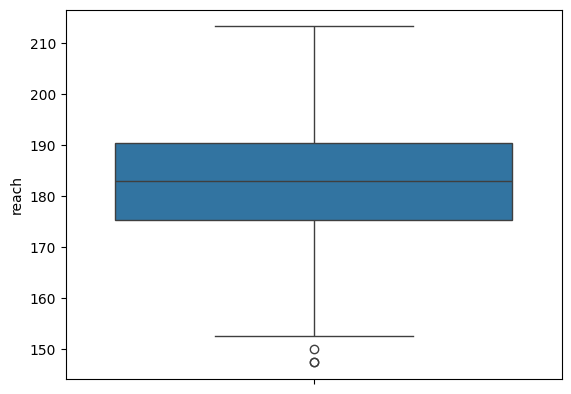

In [456]:
#Checking for outliers in r_td column
sns.boxplot(fighter_data['reach'])

In [457]:
#Filling data in reach field
fighter_data['reach'] = fighter_data['reach'].fillna(fighter_data['reach'].median())

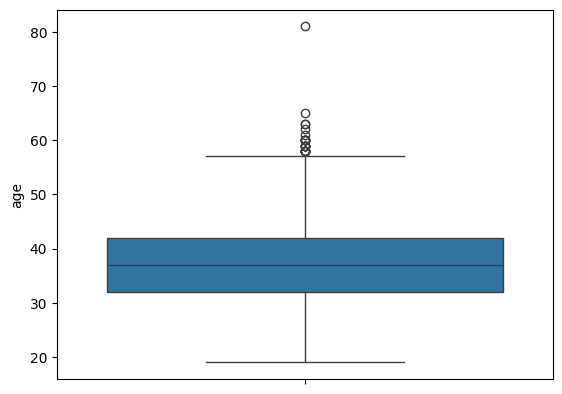

In [458]:
#checking for outliers in age column of fighter_data
sns.boxplot(fighter_data['age'])
plt.show()

In [459]:
#Using median to fill null values in age column
#As there are outliers in age columns
fighter_data['age'] = fighter_data['age'].fillna(fighter_data['age'].median())

In [460]:
#using mode to fill null value in stance column
fighter_data['stance'] = fighter_data['stance'].fillna(fighter_data['stance'].mode()[0])

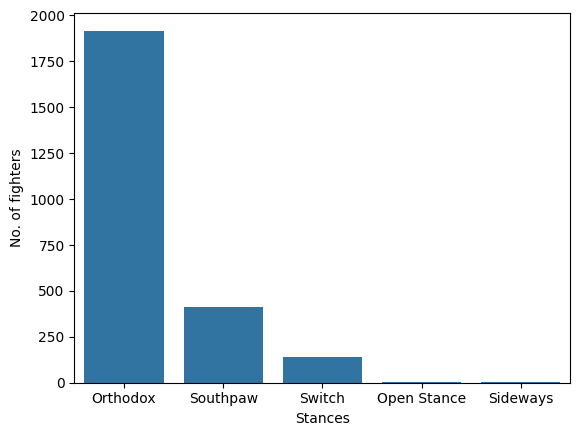

In [461]:
unique_stance = fighter_data['stance'].value_counts().index
count_stance = fighter_data['stance'].value_counts().values
sns.barplot(x=unique_stance,y=count_stance)
plt.xlabel("Stances")
plt.ylabel("No. of fighters")
plt.show()

In [462]:
# Combining SLpm and SApm to create Strking Efficiency(SEff)
fighter_data['SEff'] = fighter_data['SLpM']/(fighter_data['SLpM']+fighter_data['SApM']) 

In [463]:
# Combining td_acc and td_def to create Grappling Score(Gscr)
fighter_data['Gscr'] = (fighter_data['td_acc'] + fighter_data['td_def'])/2

In [464]:
# Combining win and loss to create win ration (win_rto)
fighter_data['win_rto'] = fighter_data['wins']/(fighter_data['wins']+fighter_data['losses'])*100

In [465]:
#Combining SEff and Gscr to get a efficiency score(EffScore)
fighter_data["EffScore"] = (fighter_data['SEff'] + fighter_data['Gscr'])/2

In [466]:
#Finding difference between wins and losses (WinDiff)
fighter_data['WinDiff'] = fighter_data['wins'] - fighter_data['losses']

In [467]:
#Getting to know the advantage relative to fighter's height
fighter_data['Reach-to-Height Ratio'] = fighter_data['reach']/fighter_data['height']

In [468]:
#Provides insight into body type differeences
fighter_data['Weight-to-Height Ratio'] = fighter_data['weight']/fighter_data['height']

In [469]:
#Droping all the unnecessary columns as they have been combined
fighter_data = fighter_data.drop(
    columns=[
        "SLpM",
        "sig_str_acc",
        "SApM",
        "str_def",
        "td_avg",
        "td_acc",
        "td_def",
        "sub_avg",
    ],
    axis=1,
)

In [470]:
#knowing how the shape has change of dataframe
fighter_data.shape

(2478, 15)

In [471]:
fighter_data.isna().sum()

name                        0
wins                        0
losses                      0
height                      0
weight                      0
reach                       0
stance                      0
age                         0
SEff                      165
Gscr                        0
win_rto                     0
EffScore                  165
WinDiff                     0
Reach-to-Height Ratio       0
Weight-to-Height Ratio      0
dtype: int64

<Axes: ylabel='EffScore'>

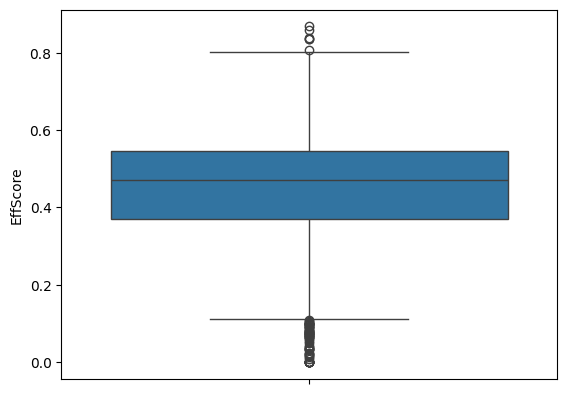

In [472]:
sns.boxplot(fighter_data['EffScore'])

In [473]:
fighter_data['EffScore'] = fighter_data['EffScore'].fillna(fighter_data['EffScore'].median())

<Axes: ylabel='SEff'>

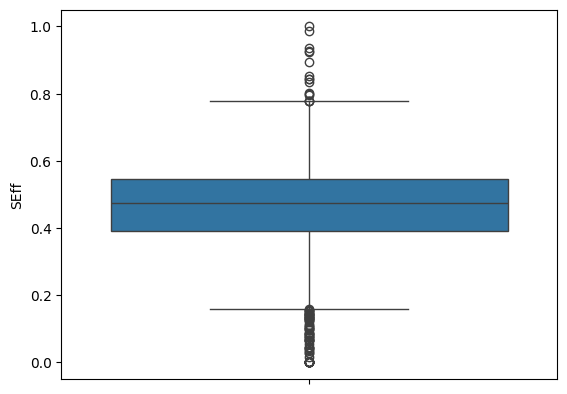

In [474]:
sns.boxplot(fighter_data['SEff'])

In [475]:
fighter_data["SEff"] = fighter_data["SEff"].fillna(
    fighter_data["SEff"].median()
)

In [476]:
#Saving the fighter data to a new csv file
fighter_data.to_csv('../Datasets/cleaned_fighter_stats.csv')

In [477]:
cleaned_data = pd.read_csv("../Datasets/cleaned_fighter_stats.csv")
cleaned_data.isna().sum()

Unnamed: 0                0
name                      0
wins                      0
losses                    0
height                    0
weight                    0
reach                     0
stance                    0
age                       0
SEff                      0
Gscr                      0
win_rto                   0
EffScore                  0
WinDiff                   0
Reach-to-Height Ratio     0
Weight-to-Height Ratio    0
dtype: int64

### **Cleaning data of Event Data**

In [478]:
#Info about the columns in fighter_data
event_detail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7582 entries, 0 to 7581
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event            7497 non-null   object 
 1   date             7497 non-null   object 
 2   location         7497 non-null   object 
 3   r_fighter        7497 non-null   object 
 4   b_fighter        7497 non-null   object 
 5   status           7582 non-null   object 
 6   r_kd             7476 non-null   float64
 7   b_kd             7476 non-null   float64
 8   r_str            7476 non-null   float64
 9   b_str            7476 non-null   float64
 10  r_td             7476 non-null   float64
 11  b_td             7476 non-null   float64
 12  r_sub            7476 non-null   float64
 13  b_sub            7476 non-null   float64
 14  weight_class     7497 non-null   object 
 15  method           7497 non-null   object 
 16  method_detailed  3836 non-null   object 
 17  round         

In [479]:
#Statistical description of non-categorial column in fighter_data
event_detail_data.describe()

,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,round
count,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7497.000000
mean,0.368914,0.061798,43.488630,28.766988,1.461343,0.668539,0.534243,0.247057,2.342804
std,0.607262,0.264120,34.591414,27.099495,1.988927,1.195232,0.941658,0.684925,1.015948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,17.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,36.000000,22.000000,1.000000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,0.000000,61.000000,42.000000,2.000000,1.000000,1.000000,0.000000,3.000000
max,5.000000,3.000000,445.000000,271.000000,21.000000,11.000000,10.000000,7.000000,5.000000


In [480]:
#Statistical description of categorial column in fighter_data
event_detail_data.describe(include="object")

,event,date,location,r_fighter,b_fighter,status,weight_class,method,method_detailed,time
count,7497,7497,7497,7497,7497,7582,7497,7497,3836,7497
unique,683,678,168,1721,2344,3,15,7,51,339
top,UFC 2: No Way Out,11/19/2016,"Las Vegas, Nevada, USA",Jim Miller,Clay Guida,win,Lightweight,U-DEC,Punches,5:00
freq,15,24,2475,26,18,7439,1298,2666,934,3512


In [481]:
#checking for percentage of null values
(event_detail_data.isna().sum() / len(event_detail_data))*100

event               1.121076
date                1.121076
location            1.121076
r_fighter           1.121076
b_fighter           1.121076
status              0.000000
r_kd                1.398048
b_kd                1.398048
r_str               1.398048
b_str               1.398048
r_td                1.398048
b_td                1.398048
r_sub               1.398048
b_sub               1.398048
weight_class        1.121076
method              1.121076
method_detailed    49.406489
round               1.121076
time                1.121076
dtype: float64

In [482]:
#Droping method_detailed as it is 49.4% null
event_detail_data = event_detail_data.drop(columns='method_detailed',axis=1)

In [483]:
#Delete rows where status column had 'Fight was not properly finished'
#As, all other columns had null values in them
event_detail_data = event_detail_data[event_detail_data['status'] != 'Fight was not properly finished']

In [484]:
#Checking how the shape has changed
event_detail_data.shape

(7497, 18)

In [485]:
#Percentage of null value now
(event_detail_data.isna().sum() / len(event_detail_data))*100

event           0.000000
date            0.000000
location        0.000000
r_fighter       0.000000
b_fighter       0.000000
status          0.000000
r_kd            0.280112
b_kd            0.280112
r_str           0.280112
b_str           0.280112
r_td            0.280112
b_td            0.280112
r_sub           0.280112
b_sub           0.280112
weight_class    0.000000
method          0.000000
round           0.000000
time            0.000000
dtype: float64

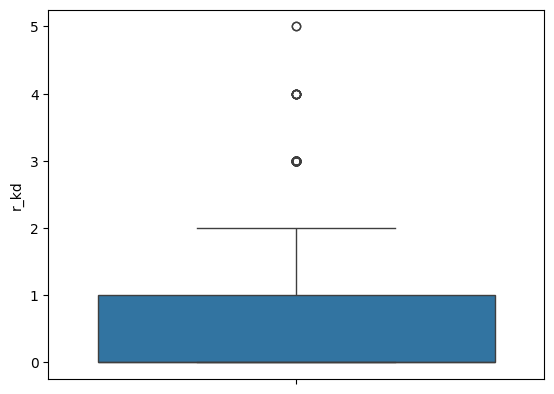

In [486]:
#checking for outliers in r_kd column in event data
sns.boxplot(event_detail_data['r_kd'])
plt.show()

In [487]:
#As, there are outliers we used median to fill null values
event_detail_data['r_kd'] = event_detail_data['r_kd'].fillna(event_detail_data['r_kd'].median())

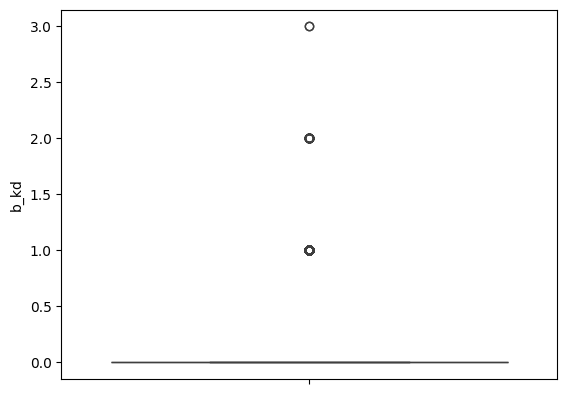

In [488]:
#Checking for outliers in b_kd column in event data
sns.boxplot(event_detail_data['b_kd'])
plt.show()

In [489]:
#As, there are outliers we used median to fill null values
event_detail_data['b_kd'] = event_detail_data['b_kd'].fillna(event_detail_data['r_kd'].median())

<Axes: ylabel='r_str'>

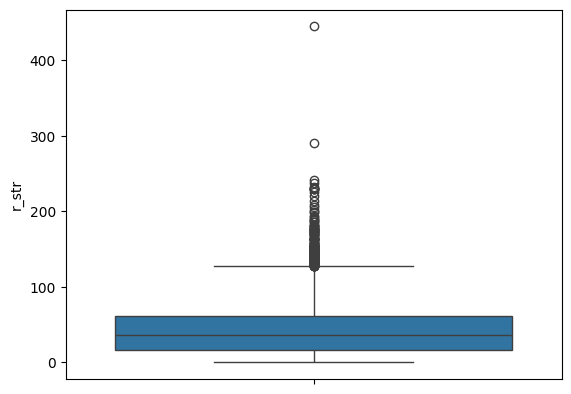

In [490]:
#Checking for outliers in r_str column
sns.boxplot(event_detail_data['r_str'])

In [491]:
#As, there are outliers we used median to fill null values
event_detail_data['r_str'] = event_detail_data['r_str'].fillna(event_detail_data['r_str'].median())

<Axes: ylabel='b_str'>

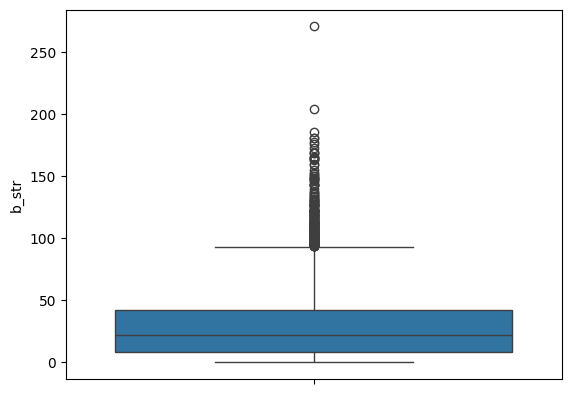

In [492]:
#Checking for outliers in b_str column
sns.boxplot(event_detail_data['b_str'])

In [493]:
#As, there are outliers we used median to fill null values
event_detail_data['b_str'] = event_detail_data['b_str'].fillna(event_detail_data['b_str'].median())

<Axes: ylabel='r_td'>

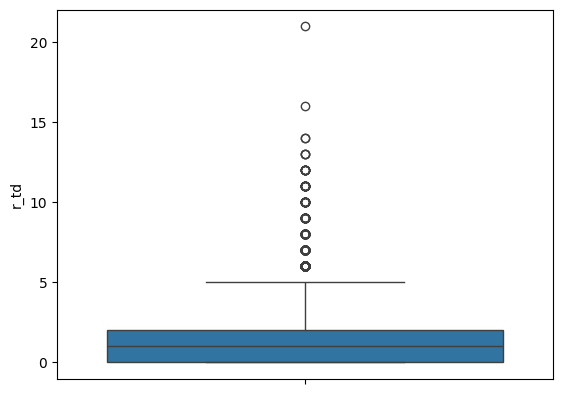

In [494]:
#Checking for outliers in r_td column
sns.boxplot(event_detail_data['r_td'])

In [495]:
#As, there are outliers we used median to fill null values
event_detail_data['r_td'] = event_detail_data['r_td'].fillna(event_detail_data['r_td'].median())

<Axes: ylabel='b_td'>

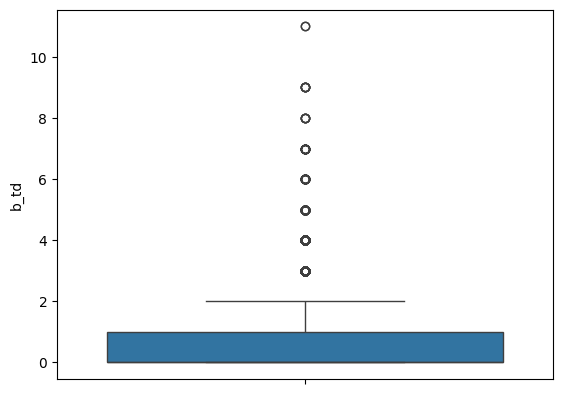

In [496]:
#Checking for outliers in b_td column
sns.boxplot(event_detail_data['b_td'])

In [497]:
#As, there are outliers we used median to fill null values
event_detail_data['b_td'] = event_detail_data['b_td'].fillna(event_detail_data['b_td'].median())

<Axes: ylabel='r_sub'>

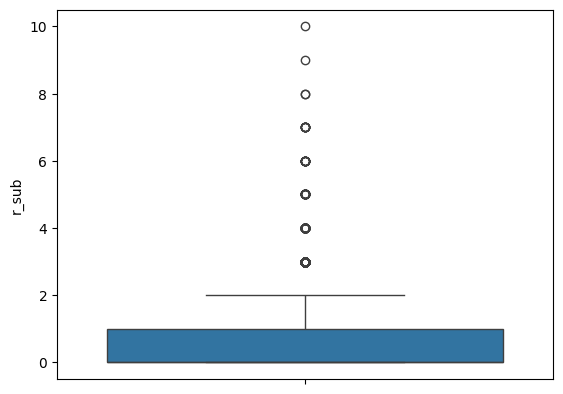

In [498]:
#Checking for outliers in r_sub column
sns.boxplot(event_detail_data['r_sub'])

In [499]:
#As, there are outliers we used median to fill null values
event_detail_data['r_sub'] = event_detail_data['r_sub'].fillna(event_detail_data['r_sub'].median())

<Axes: ylabel='b_sub'>

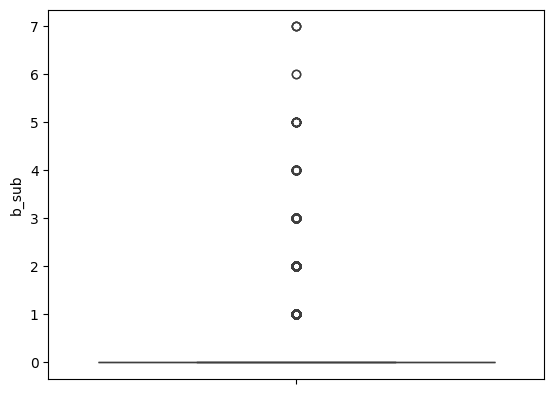

In [500]:
#Checking for outliers in b_sub column
sns.boxplot(event_detail_data['b_sub'])

In [501]:
#As, there are outliers we used median to fill null values
event_detail_data['b_sub'] = event_detail_data['b_sub'].fillna(event_detail_data['b_sub'].median())

In [502]:
#Deriving winner column
event_detail_data['winner'] = np.where(event_detail_data['status'] == 'win', event_detail_data['r_fighter'],event_detail_data['b_fighter'])

In [503]:
# Split the 'time' column into minutes and seconds
event_detail_data[["minutes", "seconds"]] = (
    event_detail_data["time"].str.split(":", expand=True).astype(int)
)

In [504]:
# Convert time to total seconds
event_detail_data["time_in_seconds"] = (event_detail_data["minutes"] * 60) + event_detail_data["seconds"]

In [505]:
#deriving fight duration in seconds
round_duration = 300  # seconds (5 minutes)
event_detail_data['fight_time_seconds'] = (event_detail_data['round'] - 1) * round_duration + event_detail_data['time_in_seconds']

In [506]:
# combining total damage by both fighter in r_total_damage and b_total_damage respectively
event_detail_data["r_total_damage"] = event_detail_data["r_kd"] + event_detail_data["r_str"]
event_detail_data["b_total_damage"] = event_detail_data["b_kd"] + event_detail_data["b_str"]

In [507]:
# combining takedowns per round by both fighter in r_td_per_round and b_td_per_round respectively
event_detail_data["r_td_per_round"] =event_detail_data["r_td"] /event_detail_data["round"]
event_detail_data["b_td_per_round"] =event_detail_data["b_td"] /event_detail_data["round"]

In [508]:
# combining submission per round by both fighter in r_sub_per_round and b_sub_per_roundrespectively
event_detail_data["r_sub_per_round"] = event_detail_data["r_sub"] / event_detail_data["round"]
event_detail_data["b_sub_per_round"] = event_detail_data["b_sub"] / event_detail_data["round"]

In [509]:
# Droping columns as they are already normalized or have been derived r_kd, b_kd, r_str, b_str, r_td, b_td, r_sub, b_sub, status, minuter, seconds, time_in_seconds
event_detail_data = event_detail_data.drop(columns=['status','r_kd', 'b_kd', 'r_str', 'b_str', 'r_td', 'b_td', 'r_sub', 'b_sub','minutes','seconds','time_in_seconds'])

In [ ]:
#saved cleaned data to new csv
event_detail_data.to_csv('../Datasets/cleaned_event_data.csv')